In [1]:
import pandas as pd
import numpy as np
import time
import sqlite3
data_home = './'

In [2]:
#读取数据集
triplet_dataset = pd.read_csv(filepath_or_buffer=data_home+'train_triplets.txt', 
                              sep='\t', header=None, 
                              names=['user','song','play_count'])

In [3]:
#数据集大小
triplet_dataset.shape

(48373586, 3)

In [4]:
#数据集信息
triplet_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48373586 entries, 0 to 48373585
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   user        object
 1   song        object
 2   play_count  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ GB


In [5]:
#查看原始数据
triplet_dataset.head(n=10)

,user,song,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBNZDC12A6D4FC103,1
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBSUJE12A6D4F8CF5,2
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBVFZR12A6D4F8AE3,1
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXALG12A8C13C108,1
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1


In [6]:
#对每一个用户，分别统计其播放量
output_dict = {}
with open(data_home+'train_triplets.txt') as f:
    for line_number, line in enumerate(f):
        #找到当前的用户
        user = line.split('\t')[0]
        #得到其播放量数据
        play_count = int(line.split('\t')[2])
        #如果字典中已经有该用户信息，在其基础上增加当前的播放量
        if user in output_dict:
            play_count +=output_dict[user]
            output_dict.update({user:play_count})
        output_dict.update({user:play_count})
# 统计 用户-总播放量
output_list = [{'user':k,'play_count':v} for k,v in output_dict.items()]
#转换成DF格式
play_count_df = pd.DataFrame(output_list)
#排序
play_count_df = play_count_df.sort_values(by = 'play_count', ascending = False)
#输出为表格，保存下来
play_count_df.to_csv(path_or_buf='user_playcount_df.csv', index = False)

In [7]:
#对每首歌，统计其播放量，统计方法跟上述类似
output_dict = {}
with open(data_home+'train_triplets.txt') as f:
    for line_number, line in enumerate(f):
        #找到当前歌曲
        song = line.split('\t')[1]
        #找到当前播放次数
        play_count = int(line.split('\t')[2])
        #统计每首歌曲被播放的总次数
        if song in output_dict:
            play_count +=output_dict[song]
            output_dict.update({song:play_count})
        output_dict.update({song:play_count})
output_list = [{'song':k,'play_count':v} for k,v in output_dict.items()]
#转换成df格式
song_count_df = pd.DataFrame(output_list)
song_count_df = song_count_df.sort_values(by = 'play_count', ascending = False)
#输出保存
song_count_df.to_csv(path_or_buf='song_playcount_df.csv', index = False)

In [8]:
#查看目前用户播放排行
play_count_df = pd.read_csv(filepath_or_buffer='user_playcount_df.csv')
play_count_df.head(n =10)

,user,play_count
0,093cb74eb3c517c5179ae24caf0ebec51b24d2a2,13132
1,119b7c88d58d0c6eb051365c103da5caf817bea6,9884
2,3fa44653315697f42410a30cb766a4eb102080bb,8210
3,a2679496cd0af9779a92a13ff7c6af5c81ea8c7b,7015
4,d7d2d888ae04d16e994d6964214a1de81392ee04,6494
5,4ae01afa8f2430ea0704d502bc7b57fb52164882,6472
6,b7c24f770be6b802805ac0e2106624a517643c17,6150
7,113255a012b2affeab62607563d03fbdf31b08e7,5656
8,6d625c6557df84b60d90426c0116138b617b9449,5620
9,99ac3d883681e21ea68071019dba828ce76fe94d,5602


In [9]:
#查看目前歌曲播放排行
song_count_df = pd.read_csv(filepath_or_buffer='song_playcount_df.csv')
song_count_df.head(10)

,song,play_count
0,SOBONKR12A58A7A7E0,726885
1,SOAUWYT12A81C206F1,648239
2,SOSXLTC12AF72A7F54,527893
3,SOFRQTD12A81C233C0,425463
4,SOEGIYH12A6D4FC0E3,389880
5,SOAXGDH12A8C13F8A1,356533
6,SONYKOW12AB01849C9,292642
7,SOPUCYA12A8C13A694,274627
8,SOUFTBI12AB0183F65,268353
9,SOVDSJC12A58A7A271,244730


In [10]:
#10W名用户的播放量占总体的比例
total_play_count = sum(song_count_df.play_count)
print ((float(play_count_df.head(n=100000).play_count.sum())/total_play_count)*100)
play_count_subset = play_count_df.head(n=100000)

40.8807280500655


In [11]:
#3W的首歌播放量占总体的比例
(float(song_count_df.head(n=30000).play_count.sum())/total_play_count)*100
song_count_subset = song_count_df.head(n=30000)

In [12]:
#取10W个用户，3W首歌
user_subset = list(play_count_subset.user)
song_subset = list(song_count_subset.song)

In [13]:
#读取原始数据集
triplet_dataset = pd.read_csv(filepath_or_buffer=data_home+'train_triplets.txt',sep='\t', 
                              header=None, names=['user','song','play_count'])
#只保留有这10W名用户的数据，其余过滤掉
triplet_dataset_sub = triplet_dataset[triplet_dataset.user.isin(user_subset) ]
del(triplet_dataset)
#只保留有这3W首歌曲的数据，其余也过滤掉
triplet_dataset_sub_song = triplet_dataset_sub[triplet_dataset_sub.song.isin(song_subset)]
del(triplet_dataset_sub)

In [14]:
#输出提取的数据
triplet_dataset_sub_song.to_csv(path_or_buf=data_home+'triplet_dataset_sub_song.csv', index=False)
#提取后数据大小
triplet_dataset_sub_song.shape

(10774558, 3)

In [15]:
#加入音乐详细信息，合并两个数据集
conn = sqlite3.connect(data_home+'track_metadata.db')
cur = conn.cursor()
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
cur.fetchall()

[('songs',)]

In [16]:
#根据歌曲名合并两个数据集
track_metadata_df = pd.read_sql(con=conn, sql='select * from songs')
track_metadata_df_sub = track_metadata_df[track_metadata_df.song_id.isin(song_subset)]
track_metadata_df_sub.to_csv(path_or_buf=data_home+'track_metadata_df_sub.csv', index=False)
track_metadata_df_sub.shape

(30447, 14)

In [17]:
#现有数据
triplet_dataset_sub_song = pd.read_csv(filepath_or_buffer=data_home+'triplet_dataset_sub_song.csv',encoding = "ISO-8859-1")
track_metadata_df_sub = pd.read_csv(filepath_or_buffer=data_home+'track_metadata_df_sub.csv',encoding = "ISO-8859-1")

In [18]:
triplet_dataset_sub_song.head()

,user,song,play_count
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7


In [19]:
track_metadata_df_sub.head()

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
0,TRMMGCB128E079651D,Get Along (Feat: Pace Won) (Instrumental),SOHNWIM12A67ADF7D9,Charango,ARU3C671187FB3F71B,067102ea-9519-4622-9077-57ca4164cfbb,Morcheeba,227.47383,0.819087,0.533117,2002,185967,-1,0
1,TRMMGTX128F92FB4D9,Viejo,SOECFIW12A8C144546,Caraluna,ARPAAPH1187FB3601B,f69d655c-ffd6-4bee-8c2a-3086b2be2fc6,Bacilos,307.51302,0.595554,0.400705,0,6825058,-1,0
2,TRMMGDP128F933E59A,I Say A Little Prayer,SOGWEOB12AB018A4D0,The Legendary Hi Records Albums_ Volume 3: Ful...,ARNNRN31187B9AE7B7,fb7272ba-f130-4f0a-934d-6eeea4c18c9a,Al Green,133.58975,0.779490,0.599210,1978,5211723,-1,11898
3,TRMMHBF12903CF6E59,At the Ball_ That's All,SOJGCRL12A8C144187,Best of Laurel & Hardy - The Lonesome Pine,AR1FEUF1187B9AF3E3,4a8ae4fd-ad6f-4912-851f-093f12ee3572,Laurel & Hardy,123.71546,0.438709,0.307120,0,8645877,-1,0
4,TRMMHKG12903CDB1B5,Black Gold,SOHNFBA12AB018CD1D,Total Life Forever,ARVXV1J1187FB5BF88,6a65d878-fcd0-42cf-aff9-ca1d636a8bcc,Foals,386.32444,0.842578,0.514523,2010,9007438,-1,0


In [20]:
#清洗数据
# 去掉无用的信息
del(track_metadata_df_sub['track_id'])
del(track_metadata_df_sub['artist_mbid'])
# 去掉重复的
track_metadata_df_sub = track_metadata_df_sub.drop_duplicates(['song_id'])
# 将这份音乐信息数据和我们之前的播放数据整合到一起
triplet_dataset_sub_song_merged = pd.merge(triplet_dataset_sub_song, track_metadata_df_sub, how='left', left_on='song', right_on='song_id')
# 可以自己改变列名
triplet_dataset_sub_song_merged.rename(columns={'play_count':'listen_count'},inplace=True)

In [21]:
# 去掉不需要的指标
del(triplet_dataset_sub_song_merged['song_id'])
del(triplet_dataset_sub_song_merged['artist_id'])
del(triplet_dataset_sub_song_merged['duration'])
del(triplet_dataset_sub_song_merged['artist_familiarity'])
del(triplet_dataset_sub_song_merged['artist_hotttnesss'])
del(triplet_dataset_sub_song_merged['track_7digitalid'])
del(triplet_dataset_sub_song_merged['shs_perf'])
del(triplet_dataset_sub_song_merged['shs_work'])

In [22]:
#清洗后的数据
triplet_dataset_sub_song_merged.head(n=10)

,user,song,listen_count,title,release,artist_name,year
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,You And Me Jesus,Tribute To Jake Hess,Jake Hess,2004
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,Uprising,Uprising,Muse,0
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,Breakfast At Tiffany's,Home,Deep Blue Something,1993
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,Lucky (Album Version),We Sing. We Dance. We Steal Things.,Jason Mraz & Colbie Caillat,0
5,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBONKR12A58A7A7E0,26,You're The One,If There Was A Way,Dwight Yoakam,1990
6,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBZZDU12A6310D8A3,7,Don't Dream It's Over,Recurring Dream_ Best Of Crowded House (Domest...,Crowded House,1986
7,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOCAHRT12A8C13A1A4,5,S.O.S.,SOS,Jonas Brothers,2007
8,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODASIJ12A6D4F5D89,1,The Invisible Man,The Invisible Man,Michael Cretu,1985
9,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODEAWL12AB0187032,8,American Idiot [feat. Green Day & The Cast Of ...,The Original Broadway Cast Recording 'American...,Green Day,0


In [42]:
triplet_dataset_sub_song_merged = triplet_dataset_sub_song_merged.to_csv('triplet_dataset_sub_song_merged.csv')

In [24]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] 

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/Users/lhc456/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/lhc456/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21463 (\N{CJK UNIFIED IDEOGRAPH-53D7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/lhc456/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27426 (\N{CJK UNIFIED IDEOGRAPH-6B22}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/lhc456/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36814 (\N{CJK UNIFIED IDEOGRAPH-8FCE}) missing from current font.

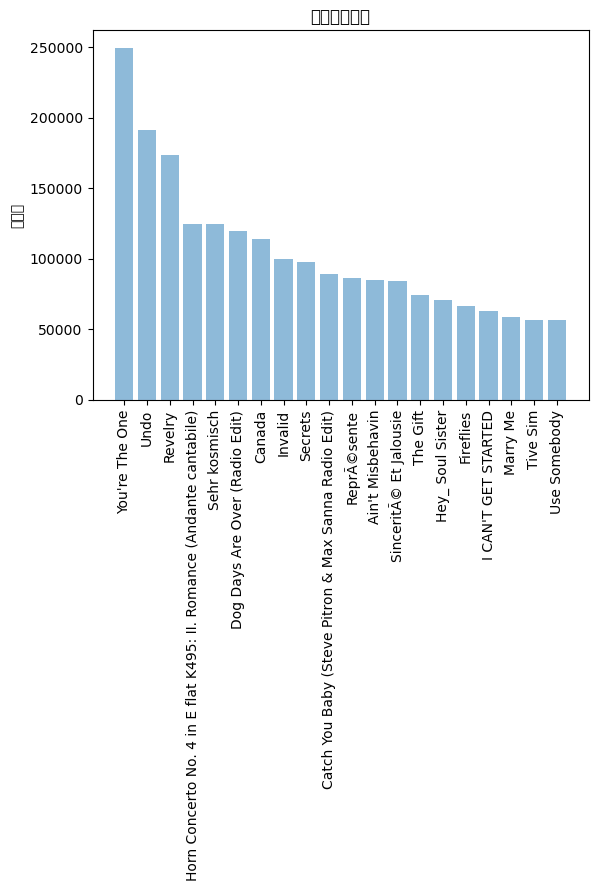

In [25]:
#展示最流行歌曲
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
#按歌曲名字来统计其播放量的总数
popular_songs = triplet_dataset_sub_song_merged[['title','listen_count']].groupby('title').sum().reset_index()
#对结果进行排序
popular_songs_top_20 = popular_songs.sort_values('listen_count', ascending=False).head(n=20)

#转换成list格式方便画图
objects = (list(popular_songs_top_20['title']))
#设置位置
y_pos = np.arange(len(objects))
#对应结果值
performance = list(popular_songs_top_20['listen_count'])
#绘图
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('播放量')
plt.title('最受欢迎歌曲')
 
plt.show()

/Users/lhc456/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/lhc456/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21463 (\N{CJK UNIFIED IDEOGRAPH-53D7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/lhc456/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27426 (\N{CJK UNIFIED IDEOGRAPH-6B22}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/lhc456/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36814 (\N{CJK UNIFIED IDEOGRAPH-8FCE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/lhc456/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19987 (\N{CJK UNIFIED IDEOGRAPH-4

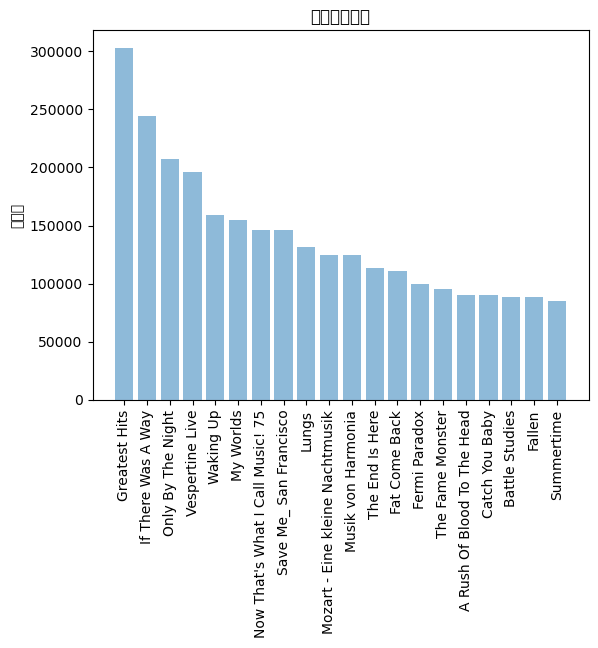

In [26]:
#按专辑名字来统计播放总量
popular_release = triplet_dataset_sub_song_merged[['release','listen_count']].groupby('release').sum().reset_index()
#排序
popular_release_top_20 = popular_release.sort_values('listen_count', ascending=False).head(n=20)

objects = (list(popular_release_top_20['release']))
y_pos = np.arange(len(objects))
performance = list(popular_release_top_20['listen_count'])
#绘图 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('播放量')
plt.title('最受欢迎专辑')
 
plt.show()

/Users/lhc456/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/lhc456/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21463 (\N{CJK UNIFIED IDEOGRAPH-53D7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/lhc456/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27426 (\N{CJK UNIFIED IDEOGRAPH-6B22}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/lhc456/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36814 (\N{CJK UNIFIED IDEOGRAPH-8FCE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/lhc456/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27468 (\N{CJK UNIFIED IDEOGRAPH-6

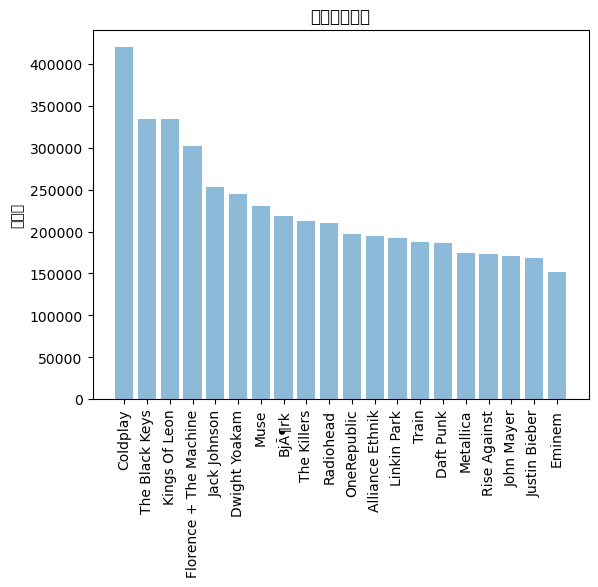

In [27]:
#按歌手来统计其播放总量
popular_artist = triplet_dataset_sub_song_merged[['artist_name','listen_count']].groupby('artist_name').sum().reset_index()
#排序
popular_artist_top_20 = popular_artist.sort_values('listen_count', ascending=False).head(n=20)

objects = (list(popular_artist_top_20['artist_name']))
y_pos = np.arange(len(objects))
performance = list(popular_artist_top_20['listen_count'])
#绘图 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('播放量')
plt.title('最受欢迎歌手')
 
plt.show()

解决冷启动问题

In [29]:
# import Recommenders as Recommenders
from sklearn.model_selection import train_test_split

In [30]:
triplet_dataset_sub_song_merged_set = triplet_dataset_sub_song_merged
train_data, test_data = train_test_split(triplet_dataset_sub_song_merged_set, test_size = 0.40, random_state=0)

In [31]:
train_data.head()

,user,song,listen_count,title,release,artist_name,year
1901799,28866ea8a809d5d46273cd0989c5515c660ef8c7,SOEYVHS12AB0181D31,1,Monster,The Fame Monster,Lady GaGa,2009
4815185,c9608a24a2a40e0ec38993a70532e7bb56eff22b,SOKIYKQ12A8AE464FC,2,Fight For Your Life,Made In NYC,The Casualties,2000
10513026,24f0b09c133a6a0fe42f097734215dceb468d449,SOETFVO12AB018DFF3,1,Free Style (feat. Kevo_ Mussilini & Lyrical 187),A Bad Azz Mix Tape,Z-RO,0
2659073,4da3c59a0af73245cea000fd5efa30384182bfcb,SOAXJOU12A6D4F6685,1,Littlest Things,Alright_ Still,Lily Allen,2006
5506263,b46c5ed385cad7ecea8af6214f440d19de6eb6c2,SOXBCAY12AB0189EE0,1,La trama y el desenlace,Amar la trama,Jorge Drexler,2010


In [32]:
def create_popularity_recommendation(train_data, user_id, item_id):
    #根据指定的特征来统计其播放情况，可以选择歌曲名，专辑名，歌手名
    train_data_grouped = train_data.groupby([item_id]).agg({user_id: 'count'}).reset_index()
    #为了直观展示，我们用得分来表示其结果
    train_data_grouped.rename(columns = {user_id: 'score'},inplace=True)
    
    #排行榜单需要排序
    train_data_sort = train_data_grouped.sort_values(['score', item_id], ascending = [0,1])
    
    #加入一项排行等级，表示其推荐的优先级
    train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
        
    #返回指定个数的推荐结果
    popularity_recommendations = train_data_sort.head(10)
    return popularity_recommendations

In [33]:
#按歌曲名
recommendations = create_popularity_recommendation(triplet_dataset_sub_song_merged,'user','title')

In [34]:
recommendations

,title,score,Rank
19580,Sehr kosmisch,18626,1.0
5780,Dog Days Are Over (Radio Edit),17635,2.0
27314,You're The One,16085,3.0
19542,Secrets,15138,4.0
18636,Revelry,14945,5.0
25070,Undo,14687,6.0
7530,Fireflies,13085,7.0
9640,Hey_ Soul Sister,12993,8.0
25216,Use Somebody,12793,9.0
9921,Horn Concerto No. 4 in E flat K495: II. Romanc...,12346,10.0


In [35]:
#按专辑名
recommendations = create_popularity_recommendation(triplet_dataset_sub_song_merged,'user','release')
recommendations

,release,score,Rank
4786,Greatest Hits,74197,1.0
7925,My Worlds,37006,2.0
7144,Lungs,30967,3.0
13737,Waking Up,27839,4.0
467,A Rush Of Blood To The Head,27008,5.0
9911,Save Me_ San Francisco,26407,6.0
8512,Only By The Night,25755,7.0
13566,Vampire Weekend,25603,8.0
11907,The Fame Monster,25040,9.0
8266,Now That's What I Call Music! 75,23291,10.0


In [36]:
#按歌手
recommendations = create_popularity_recommendation(triplet_dataset_sub_song_merged,'user','artist_name')
recommendations

,artist_name,score,Rank
1686,Coldplay,125818,1.0
7505,The Black Keys,95067,2.0
7795,The Killers,74316,3.0
3594,Jack Johnson,72891,4.0
4298,Kings Of Leon,69684,5.0
6245,Radiohead,69342,6.0
1908,Daft Punk,64997,7.0
5467,Muse,64687,8.0
2850,Florence + The Machine,61106,9.0
5202,Metallica,46141,10.0


In [37]:
import numpy as np
import pandas
import math

# 基于流行度的推荐模型
class popularity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.popularity_recommendations = None

    # 创建基于流行度的推荐模型
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id
    # 获取每个item的播放量，作为推荐指标
        train_data_grouped = train_data.groupby([self.item_id]).agg({self.user_id: 'count'}).reset_index()
    #为了直观展示，用得分表示结果
        train_data_grouped.rename(columns={user_id: 'score'}, inplace=True)
    #根据得分给歌曲排序
        train_data_sort = train_data_grouped.sort_values(['score', self.item_id], ascending=[0, 1])
    #加入一项排行等级，表示其推荐的优先级
        train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
    # 得到top10列表
        self.popularity_recommendations = train_data_sort.head(10)
    #使用基于流行度的算法进行推荐
    def recommend(self, user_id):
        user_recommendations = self.popularity_recommendations
    #根据用户id为指定用户生成推荐列表
        user_recommendations['user_id'] = user_id
        cols = user_recommendations.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        user_recommendations = user_recommendations[cols]
        return user_recommendations

#基于项目的协同过滤推荐
class item_similarity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.cooccurence_matrix = None
        self.songs_dict = None
        self.rev_songs_dict = None
        self.item_similarity_recommendations = None
    #给定用户，找出用户听过的所有歌曲
    def get_user_items(self, user):
        user_data = self.train_data[self.train_data[self.user_id] == user]
        user_items = list(user_data[self.item_id].unique())
        return user_items
    #给定歌曲，找出听过这首歌的所有用户
    def get_item_users(self, item):
        item_data = self.train_data[self.train_data[self.item_id] == item]
        item_users = set(item_data[self.user_id].unique())
        return item_users
    #对数据集中的歌曲去重
    def get_all_items_train_data(self):
        all_items = list(self.train_data[self.item_id].unique())
        return all_items

    #Jaccard系数构建相似度矩阵
    def construct_cooccurence_matrix(self, user_songs, all_songs):
        user_songs_users = []
        for i in range(0, len(user_songs)):
            user_songs_users.append(self.get_item_users(user_songs[i]))
        #设置矩阵大小为某一指定用户听过的所有歌曲×数据集中歌曲总数
        cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_songs), len(all_songs))), float)

        for i in range(0, len(all_songs)):
            #找出用户听过的第i首歌被哪些人听过
            songs_i_data = self.train_data[self.train_data[self.item_id] == all_songs[i]]
            users_i = set(songs_i_data[self.user_id].unique())
            #找出歌曲集中第j首歌被哪些人听过
            for j in range(0, len(user_songs)):
                users_j = user_songs_users[j]

                # 计算听过i歌曲人数和j歌曲人数的交集
                users_intersection = users_i.intersection(users_j)

                if len(users_intersection) != 0:
                    # 计算听过i歌曲人数和j歌曲人数的并集
                    users_union = users_i.union(users_j)
                    #使用Jaccard系数计算i,j之间的相似度
                    cooccurence_matrix[j,i] = float(len(users_intersection)) / float(len(users_union))
                else:
                    cooccurence_matrix[j,i] = 0
        return cooccurence_matrix

    # 使用相似度矩阵进行topN推荐
    def generate_top_recommendations(self, user, cooccurence_matrix, all_songs, user_songs):
        print("Non zero values in cooccurence_matrix :%d" % np.count_nonzero(cooccurence_matrix))
        # 对每一首待推荐歌曲，计算其与用户听过的所有歌曲相似度的平均值
        user_sim_scores = cooccurence_matrix.sum(axis=0) / float(cooccurence_matrix.shape[0])
        user_sim_scores = np.array(user_sim_scores)[0].tolist()
        sort_index = sorted(((e, i) for i, e in enumerate(list(user_sim_scores))), reverse=True)
        columns = ['user_id', 'song', 'score', 'rank']
        df = pandas.DataFrame(columns=columns)

        # 推荐相似度最高的5首歌
        rank = 1
        for i in range(0, len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_songs[sort_index[i][1]] not in user_songs and rank <= 5:
                df.loc[len(df)] = [user, all_songs[sort_index[i][1]], sort_index[i][0], rank]
                rank = rank + 1
        if df.shape[0] == 0:
            print("The current user has no songs for training the item similarity based recommendation model.")
            return -1
        else:
            return df

    # 创建基于项目的协同过滤推荐模型
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id
    #进行推荐
    def recommend(self, user):
        user_songs = self.get_user_items(user)
        print("No. of unique songs for the user: %d" % len(user_songs))
        all_songs = self.get_all_items_train_data()
        print("no. of unique songs in the training set: %d" % len(all_songs))
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_songs)
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
        return df_recommendations
"""
 #构建相似度矩阵,考虑用户活跃度影响，进行矩阵归一化
    def construct_cooccurence_matrix(self, user_songs, all_songs):
        # 每首歌都找出听过的人
        user_songs_users = []
        for i in range(0, len(user_songs)):
            user_songs_users.append(self.get_item_users(user_songs[i]))
        # 矩阵大小： 用户听过的歌曲数×歌曲总数
        cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_songs), len(all_songs))), float)
        # 计算用户歌曲和其他所有歌曲的相似度
        for i in range(0, len(all_songs)):
            #从所有歌中确定了某首歌
            songs_i_data = self.train_data[self.train_data[self.item_id] == all_songs[i]]    
            #找出了听过歌的用户
            users_i = set(songs_i_data[self.user_id].unique())                         
            for j in range(0, len(user_songs)):

               #听过j的人
                users_j = user_songs_users[j]   
               #听过i和j的人的交集
                users_intersection = users_i.intersection(users_j)
                if len(users_intersection) != 0:
                    for k in users_intersection:
                        user_k = self.get_user_items(k)
                        cooccurence_matrix[j, i] += 1/math.log(1 + len(user_k)*1.0)
                    cooccurence_matrix[j, i] = float(cooccurence_matrix[j, i]/math.sqrt(len(users_i)*len(users_j)))
                else:
                    cooccurence_matrix[j, i] = 0
        coo_max = cooccurence_matrix.max(axis=1)
        cooccurence_matrix = cooccurence_matrix/coo_max
        #print(cooccurence_matrix)

        return cooccurence_matrix
"""

'\n #构建相似度矩阵,考虑用户活跃度影响，进行矩阵归一化\n    def construct_cooccurence_matrix(self, user_songs, all_songs):\n        # 每首歌都找出听过的人\n        user_songs_users = []\n        for i in range(0, len(user_songs)):\n            user_songs_users.append(self.get_item_users(user_songs[i]))\n        # 矩阵大小： 用户听过的歌曲数×歌曲总数\n        cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_songs), len(all_songs))), float)\n        # 计算用户歌曲和其他所有歌曲的相似度\n        for i in range(0, len(all_songs)):\n            #从所有歌中确定了某首歌\n            songs_i_data = self.train_data[self.train_data[self.item_id] == all_songs[i]]    \n            #找出了听过歌的用户\n            users_i = set(songs_i_data[self.user_id].unique())                         \n            for j in range(0, len(user_songs)):\n\n               #听过j的人\n                users_j = user_songs_users[j]   \n               #听过i和j的人的交集\n                users_intersection = users_i.intersection(users_j)\n                if len(users_intersection) != 0:\n                    for

In [39]:
#方法已封装在.py文件Recommenders中，可直接调用
pop_rec = popularity_recommender_py()
pop_rec.create(train_data, 'user', 'title')
user_id = list(train_data.user)[8]
pop_rec.recommend(user_id)

,user_id,title,score,Rank
19580,5fd60c59d3e796b9b184768642d5fbb3750e575f,Sehr kosmisch,11175,1.0
5780,5fd60c59d3e796b9b184768642d5fbb3750e575f,Dog Days Are Over (Radio Edit),10621,2.0
27314,5fd60c59d3e796b9b184768642d5fbb3750e575f,You're The One,9590,3.0
19542,5fd60c59d3e796b9b184768642d5fbb3750e575f,Secrets,9119,4.0
18636,5fd60c59d3e796b9b184768642d5fbb3750e575f,Revelry,8988,5.0
25070,5fd60c59d3e796b9b184768642d5fbb3750e575f,Undo,8836,6.0
7530,5fd60c59d3e796b9b184768642d5fbb3750e575f,Fireflies,7884,7.0
9640,5fd60c59d3e796b9b184768642d5fbb3750e575f,Hey_ Soul Sister,7714,8.0
25216,5fd60c59d3e796b9b184768642d5fbb3750e575f,Use Somebody,7610,9.0
9921,5fd60c59d3e796b9b184768642d5fbb3750e575f,Horn Concerto No. 4 in E flat K495: II. Romanc...,7422,10.0


基于物品的协同过滤推荐

In [43]:
triplet_dataset_sub_song_merged = pd.read_csv(filepath_or_buffer='triplet_dataset_sub_song_merged.csv',encoding = "ISO-8859-1")
song_count_df = pd.read_csv(filepath_or_buffer='song_playcount_df.csv')
play_count_df = pd.read_csv(filepath_or_buffer='user_playcount_df.csv')
play_count_subset = play_count_df.head(n=100)
song_count_subset = song_count_df.head(n=100)
user_subset = list(play_count_subset.user)
song_subset = list(song_count_subset.song)
#选取部分数据，用户播放量和歌曲播放量均为前100的数据
triplet_dataset_sub_song_merged_sub = triplet_dataset_sub_song_merged[triplet_dataset_sub_song_merged.song.isin(song_subset)]
triplet_dataset_sub_song_merged_sub = triplet_dataset_sub_song_merged_sub[triplet_dataset_sub_song_merged_sub.user.isin(user_subset)]

In [44]:
triplet_dataset_sub_song_merged_sub.to_csv(path_or_buf='triplet_dataset_sub_song_merged_sub.csv', index = False)

In [45]:
#数据大小
triplet_dataset_sub_song_merged_sub = pd.read_csv(filepath_or_buffer='triplet_dataset_sub_song_merged_sub.csv',encoding = "ISO-8859-1")
triplet_dataset_sub_song_merged_sub.shape

(2039, 8)

In [47]:
#利用Jaccard相似系数进行推荐
# import Recommenders as n
triplet_dataset_sub_song_merged_sub = pd.read_csv(filepath_or_buffer='triplet_dataset_sub_song_merged_sub.csv',encoding = "ISO-8859-1")
#train_data, test_data = train_test_split(triplet_dataset_sub_song_merged_sub, test_size = 0.30, random_state=0)
train_data = triplet_dataset_sub_song_merged_sub
is_model = item_similarity_recommender_py()
is_model.create(train_data, 'user', 'title')
user_id = list(train_data.user)[8]
is_model.recommend(user_id)
#user_items = is_model.get_user_items(user_id)

No. of unique songs for the user: 17
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :1684


,user_id,song,score,rank
0,283882c3d18ff2ad0e17124002ec02b847d06e9a,Undo,0.390851,1
1,283882c3d18ff2ad0e17124002ec02b847d06e9a,ReprÃÂÃÂ©sente,0.390698,2
2,283882c3d18ff2ad0e17124002ec02b847d06e9a,Pursuit Of Happiness (nightmare),0.381792,3
3,283882c3d18ff2ad0e17124002ec02b847d06e9a,Catch You Baby (Steve Pitron & Max Sanna Radio...,0.380663,4
4,283882c3d18ff2ad0e17124002ec02b847d06e9a,Alejandro,0.378687,5


In [48]:
#考虑用户活跃度以及对相似度矩阵归一化后的推荐
# import recom as n
triplet_dataset_sub_song_merged_sub = pd.read_csv(filepath_or_buffer='triplet_dataset_sub_song_merged_sub.csv',encoding = "ISO-8859-1")
#train_data, test_data = train_test_split(triplet_dataset_sub_song_merged_sub, test_size = 0.30, random_state=0)
train_data = triplet_dataset_sub_song_merged_sub
is_model = item_similarity_recommender_py()
is_model.create(train_data, 'user', 'title')
user_id = list(train_data.user)[8]
is_model.recommend(user_id)

No. of unique songs for the user: 17
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :1684


,user_id,song,score,rank
0,283882c3d18ff2ad0e17124002ec02b847d06e9a,Undo,0.390851,1
1,283882c3d18ff2ad0e17124002ec02b847d06e9a,ReprÃÂÃÂ©sente,0.390698,2
2,283882c3d18ff2ad0e17124002ec02b847d06e9a,Pursuit Of Happiness (nightmare),0.381792,3
3,283882c3d18ff2ad0e17124002ec02b847d06e9a,Catch You Baby (Steve Pitron & Max Sanna Radio...,0.380663,4
4,283882c3d18ff2ad0e17124002ec02b847d06e9a,Alejandro,0.378687,5


In [51]:
#推荐系统测评
# import Recommenders as n
from sklearn.model_selection import KFold
#import n as n
train_data = pd.read_csv(filepath_or_buffer='triplet_dataset_sub_song_merged_sub.csv',encoding = "ISO-8859-1")
is_model = item_similarity_recommender_py()
is_model.create(train_data, 'user', 'title')
all_song = is_model.get_all_items_train_data()
pre_list = []
rec_list = []
cov_list = []
#K折交叉验证，这里选择将数据集分成5份，每份轮流作为验证集，其余作为训练集
kf = KFold(n_splits=5,shuffle=True,random_state = 5)
for i, (train_index, test_index) in enumerate(kf.split(train_data)):
    hit = 0
    n_pre = 0
    n_rec = 0
    test = []
    train = []
    rec_all = []
    column = ['user_id', 'song']
    mydf = pd.DataFrame(columns=column)
    df = pd.DataFrame(columns=column)
    #利用Kfold划分出来的只是索引号，根据索引号找到所需数据，分别存入训练集、验证集
    for j in test_index:
        u = list(train_data.user)[j]
        s = list(train_data.song)[j]
        #mydf = pd.DataFrame(columns=column)
       # mm = pd.DataFrame([[u,s]])
        #mydf = mydf.append(mm)
        mydf.loc[len(mydf)] = [u, s]
        if u not in test:
            test.append(u)
    for k in train_index:
        uu = list(train_data.user)[k]
        ss = list(train_data.song)[k]
        df.loc[len(df)] = [uu, ss]
        if uu not in train:
            train.append(uu)

    #print(df,test,train)
    #对训练集中每个用户进行推荐
    for uid in train:
        if uid not in test:
            continue
        else:
            model_train = item_similarity_recommender_py()
            model_train.create(df, 'user_id', 'song')
            model_test = item_similarity_recommender_py()
            model_test.create(mydf,'user_id', 'song')
            #记录推荐结果
            rec = model_train.recommend(uid)
            #在测试集中找出此推荐用户听过的歌
            listen_items = set(model_test.get_user_items(uid))
            #print(listen_items)
            rec_item = set(rec['song'])
                #print("推荐", rec_item)
                #找出推荐的和用户听过歌的交集
            ht = len(listen_items.intersection(rec_item))
        #推荐到用户听过的歌的总数
        hit = ht + hit
        #总推荐数
        n_pre = n_pre + len(rec_item)
        #用户总共听过的歌
        n_rec = n_rec + len(listen_items)
        #推荐了多少不同的歌
        for item in list(rec.song):
            if item not in rec_all:
                rec_all.append(item)
        # 计算准确率、召回率、覆盖率
    pre_list.append(hit/(1.0*n_pre))
    rec_list.append(hit/(1.0*n_rec))
    cov_list.append(len(rec_all)/len(all_song))
#计算k次的结果取平均
print(pre_list,rec_list,cov_list)
print('准确率:', np.mean(pre_list))
print('召回率：', np.mean(rec_list))
print('覆盖率', np.mean(cov_list))

No. of unique songs for the user: 13
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :1286
No. of unique songs for the user: 11
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :1089
No. of unique songs for the user: 11
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :1089
No. of unique songs for the user: 38
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :3762
No. of unique songs for the user: 2
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :198
No. of unique songs for the user: 59
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :5843
No. of unique songs for the user: 26
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :2570
No. of unique songs for the user: 39
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix 

Non zero values in cooccurence_matrix :7624
No. of unique songs for the user: 18
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :1779
No. of unique songs for the user: 2
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :198
No. of unique songs for the user: 21
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :2077
No. of unique songs for the user: 9
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :888
No. of unique songs for the user: 17
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :1683
No. of unique songs for the user: 4
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :396
No. of unique songs for the user: 2
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :198
No. of unique songs for the user: 4
no. of unique songs in the training set: 100
N

Non zero values in cooccurence_matrix :3564
No. of unique songs for the user: 75
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :7427
No. of unique songs for the user: 18
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :1783
No. of unique songs for the user: 2
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :198
No. of unique songs for the user: 20
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :1979
No. of unique songs for the user: 12
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :1190
No. of unique songs for the user: 1
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :99
No. of unique songs for the user: 10
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :990
No. of unique songs for the user: 13
no. of unique songs in the training set: 10

Non zero values in cooccurence_matrix :4252
No. of unique songs for the user: 6
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :595
No. of unique songs for the user: 41
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :4057
No. of unique songs for the user: 20
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :1980
No. of unique songs for the user: 8
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :793
No. of unique songs for the user: 31
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :3067
No. of unique songs for the user: 81
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :8009
No. of unique songs for the user: 17
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :1683
No. of unique songs for the user: 26
no. of unique songs in the training set: 

Non zero values in cooccurence_matrix :493
No. of unique songs for the user: 9
no. of unique songs in the training set: 99
Non zero values in cooccurence_matrix :889
No. of unique songs for the user: 3
no. of unique songs in the training set: 99
Non zero values in cooccurence_matrix :297
No. of unique songs for the user: 14
no. of unique songs in the training set: 99
Non zero values in cooccurence_matrix :1379
No. of unique songs for the user: 6
no. of unique songs in the training set: 99
Non zero values in cooccurence_matrix :594
No. of unique songs for the user: 2
no. of unique songs in the training set: 99
Non zero values in cooccurence_matrix :198
No. of unique songs for the user: 9
no. of unique songs in the training set: 99
Non zero values in cooccurence_matrix :888
No. of unique songs for the user: 4
no. of unique songs in the training set: 99
Non zero values in cooccurence_matrix :395
No. of unique songs for the user: 50
no. of unique songs in the training set: 99
Non zero valu

Non zero values in cooccurence_matrix :4837
No. of unique songs for the user: 44
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :4352
No. of unique songs for the user: 16
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :1582
No. of unique songs for the user: 1
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :99
No. of unique songs for the user: 13
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :1285
No. of unique songs for the user: 4
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :394
No. of unique songs for the user: 11
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :1086
No. of unique songs for the user: 4
no. of unique songs in the training set: 100
Non zero values in cooccurence_matrix :396
No. of unique songs for the user: 18
no. of unique songs in the training set: 100